<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/TestXGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import joblib
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold


In [5]:
import pandas as pd
data2 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /df_2_Group_5_Fold.xlsx')
data2 = data2.iloc[:, 1:]
data2

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold
0,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2016-08-15 08:13:26.043,...,91.00,5.284,215.00,81.00,123.00,99.00,21.019,1,good,1
1,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,2017-10-03 07:37:22.777,...,86.00,5.755,219.00,64.00,146.00,73.00,15.198,1,bad,1
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,2018-12-12 07:58:57.190,...,100.00,5.300,193.00,62.00,129.00,65.00,30.879,1,good,1
3,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2019-12-19 08:19:38.647,...,89.00,5.562,205.00,69.00,139.00,76.00,36.916,1,good,1
4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,2021-03-04 07:55:40.703,...,88.00,5.500,198.00,74.00,129.00,60.00,28.684,1,bad,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,0,1,0,2023-04-04 08:28:58.833,33.68,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:31.910,...,103.00,5.900,165.00,311.00,84.00,43.00,131.300,1,good,4
52616,3319971,9270331,-0.692078,0,1,0,2023-04-04 08:49:20.047,26.47,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:53.720,...,99.00,7.100,154.00,196.00,83.00,42.00,325.800,1,good,0
52617,3320048,9242721,7.217875,0,0,1,2023-04-10 08:36:15.217,70.36,OPD AE-DV191,2022-03-05 12:36:33.263,...,123.99,6.457,112.00,96.00,64.00,33.00,104.371,1,bad,1
52618,3320050,9257281,-32.794557,0,1,0,2023-04-10 08:58:57.267,30.69,หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ,2022-03-10 07:42:44.243,...,96.00,5.715,202.31,93.29,136.63,67.35,27.246,1,good,2


In [6]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import joblib

In [7]:
data2['NATNL'] = data2['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [8]:
data2 = data2.sort_values(['PatientUID', 'PatientVisitUID'])
data2['TimeDiff'] = data2.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
data2['TimeDiff'] = data2['TimeDiff'].fillna(0)

In [9]:
data2['time_t1'] = pd.to_datetime(data2['time_t1'])

In [10]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(data2[column].unique())}
    data2[column] = data2[column].map(encoding_map)

In [11]:
data = data2.copy()

In [42]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
X = data2.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold'], axis=1)
y = data2['Group']
all_folds = data2['Fold'].unique()
X_train_scaled_list = []
y_train_list = []
X_test_scaled_list = []
y_test_list = []
for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = data2['Fold'].isin(train_folds)
    test_indices = data2['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_train_scaled_list.append(X_train_scaled)
    y_train_list.append(y_train)
    X_test_scaled_list.append(X_test_scaled)
    y_test_list.append(y_test)

for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
            zip(X_train_scaled_list, y_train_list, X_test_scaled_list, y_test_list, kf.split(all_folds))
    ):
        train_folds, test_fold = train_fold_indices
        print(f"Fold {fold + 1}:")
        print(f"Training set size: {X_train_scaled_fold.shape}")
        print(f"Test set size: {X_test_scaled_fold.shape}")
        print(f"Folds in training set: {train_folds.tolist()}")
        print(f"Folds in test set: {test_fold}")
        print("---\n")


Fold 1:
Training set size: (42027, 75)
Test set size: (10593, 75)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---

Fold 2:
Training set size: (41978, 75)
Test set size: (10642, 75)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---

Fold 3:
Training set size: (42017, 75)
Test set size: (10603, 75)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---

Fold 4:
Training set size: (42184, 75)
Test set size: (10436, 75)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---

Fold 5:
Training set size: (42274, 75)
Test set size: (10346, 75)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---



In [43]:
X = data2.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold',], axis=1)
y = data2['Group']

In [44]:
import json

json_file_path = '/content/drive/MyDrive/ckdresearch2023/Assign/GridSearchClassification/xgb_grid_data2_class.json'
with open(json_file_path, 'r') as f:
    xgb_grid_search_results = json.load(f)

print(xgb_grid_search_results)

[{'fold': 1, 'best_params': {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}, 'best_score': 0.843447751788519}, {'fold': 2, 'best_params': {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}, 'best_score': 0.8455858017984685}, {'fold': 3, 'best_params': {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}, 'best_score': 0.8452476791295629}, {'fold': 4, 'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}, 'best_score': 0.8445523218380458}, {'fold': 5, 'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}, 'best_score': 0.8444439280570168}]


In [45]:
# Function to generate a report
def generate_report(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1]
    })

In [46]:
def plot_roc_curve(model_name, y_true, y_probs, color):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})', color=color)


In [ ]:
!pip install shap

In [48]:
import shap

#Classification: Group exclude slopes

In [63]:
X = data2.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold','Slopes'], axis=1)
y = data2['Group']

In [64]:
xgb_metrics_list = []
confusion_matrices = []
smote = SMOTE()
data_X_train_before_resampled = []
data_y_train_before_resampled = []
data_X_train_after_resampled = []
data_y_train_after_resampled = []
data_test_sample_list = []
shap_values_list = []

for fold, (train_folds, test_fold) in enumerate(kf.split(all_folds)):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = data2['Fold'].isin(train_folds)
    test_indices = data2['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    data_X_train_before_resampled.append(X_train)
    data_y_train_before_resampled.append(y_train)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    data_X_train_after_resampled.append(X_train_resampled)
    data_y_train_after_resampled.append(y_train_resampled)
    data_test_sample_list.append(len(X_test))
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)
    best_params = xgb_grid_search_results[fold]['best_params']
    xgb_classifier = XGBClassifier(**best_params)
    xgb_classifier.fit(X_train_scaled, y_train_resampled)
    xgb_predictions = xgb_classifier.predict(X_test_scaled)
    xgb_accuracy = accuracy_score(y_test, xgb_predictions)
    xgb_precision = precision_score(y_test, xgb_predictions)
    xgb_recall = recall_score(y_test, xgb_predictions)
    xgb_f1 = f1_score(y_test, xgb_predictions)
    xgb_confusion_matrix = confusion_matrix(y_test, xgb_predictions)
    confusion_matrices.append(xgb_confusion_matrix.tolist())
    explainer = shap.TreeExplainer(xgb_classifier)
    shap_values = explainer.shap_values(X_test_scaled)
    shap_values_list.append(shap_values)
    xgb_metrics_list.append({
        'Fold': fold + 1,
        'Accuracy': xgb_accuracy,
        'Precision': xgb_precision,
        'Recall': xgb_recall,
        'F1 Score': xgb_f1,
    })

In [65]:
xgb_metrics_df = pd.DataFrame(xgb_metrics_list)
print(xgb_metrics_df)

   Fold  Accuracy  Precision    Recall  F1 Score
0     1  0.761541   0.208225  0.195466  0.201643
1     2  0.761887   0.226378  0.202941  0.214020
2     3  0.754786   0.216696  0.222763  0.219688
3     4  0.781621   0.234802  0.195446  0.213324
4     5  0.783781   0.255620  0.186061  0.215363


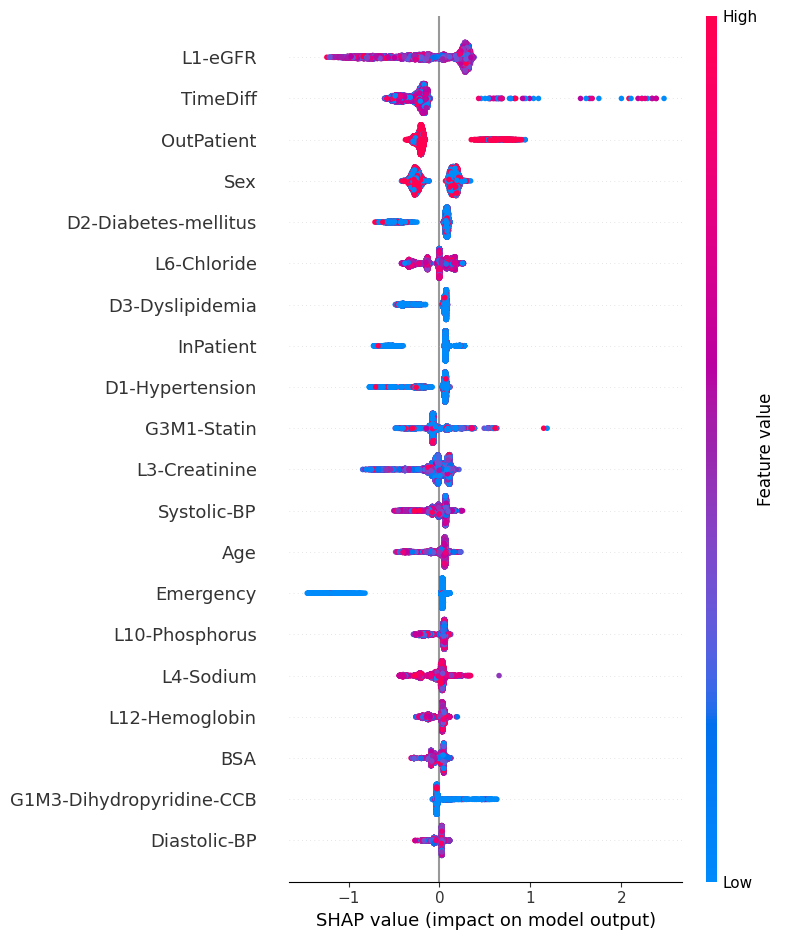

In [66]:
import shap
import matplotlib.pyplot as plt

# Assuming shap_values_list contains the SHAP values for each fold
fold_to_visualize = 0

shap_values = shap_values_list[fold_to_visualize][:X_test_scaled.shape[0]]
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, show=False)
plt.show()


#Classification: Group include slopes

In [ ]:
X = data2.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold'], axis=1)
y = data2['Group']

In [49]:
xgb_metrics_list = []
confusion_matrices = []
smote = SMOTE()
data_X_train_before_resampled = []
data_y_train_before_resampled = []
data_X_train_after_resampled = []
data_y_train_after_resampled = []
data_test_sample_list = []
shap_values_list = []

for fold, (train_folds, test_fold) in enumerate(kf.split(all_folds)):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = data2['Fold'].isin(train_folds)
    test_indices = data2['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    data_X_train_before_resampled.append(X_train)
    data_y_train_before_resampled.append(y_train)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    data_X_train_after_resampled.append(X_train_resampled)
    data_y_train_after_resampled.append(y_train_resampled)
    data_test_sample_list.append(len(X_test))
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)
    best_params = xgb_grid_search_results[fold]['best_params']
    xgb_classifier = XGBClassifier(**best_params)
    xgb_classifier.fit(X_train_scaled, y_train_resampled)
    xgb_predictions = xgb_classifier.predict(X_test_scaled)
    xgb_accuracy = accuracy_score(y_test, xgb_predictions)
    xgb_precision = precision_score(y_test, xgb_predictions)
    xgb_recall = recall_score(y_test, xgb_predictions)
    xgb_f1 = f1_score(y_test, xgb_predictions)
    xgb_confusion_matrix = confusion_matrix(y_test, xgb_predictions)
    confusion_matrices.append(xgb_confusion_matrix.tolist())
    explainer = shap.TreeExplainer(xgb_classifier)
    shap_values = explainer.shap_values(X_test_scaled)
    shap_values_list.append(shap_values)
    xgb_metrics_list.append({
        'Fold': fold + 1,
        'Accuracy': xgb_accuracy,
        'Precision': xgb_precision,
        'Recall': xgb_recall,
        'F1 Score': xgb_f1,
    })

In [50]:
xgb_metrics_df = pd.DataFrame(xgb_metrics_list)
print(xgb_metrics_df)

   Fold  Accuracy  Precision    Recall  F1 Score
0     1  0.999342   1.000000  0.995882  0.997937
1     2  0.999617   0.997476  1.000000  0.998737
2     3  0.999903   1.000000  0.999394  0.999697
3     4  0.999717   0.998165  1.000000  0.999082
4     5  0.999811   1.000000  0.998783  0.999391


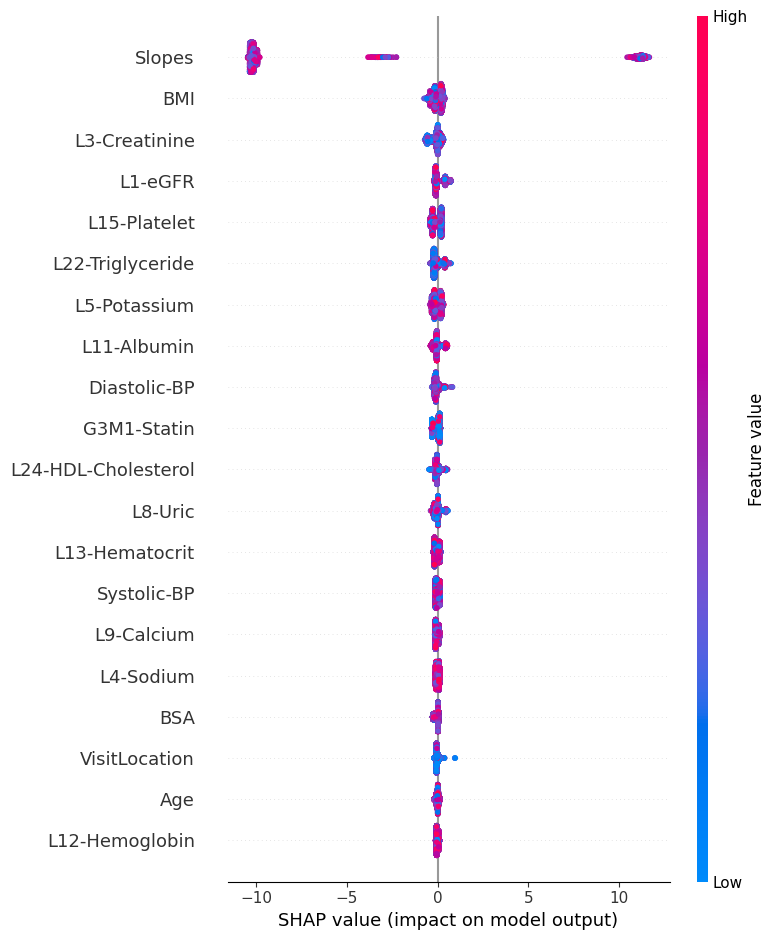

In [51]:
import shap
import matplotlib.pyplot as plt

# Assuming shap_values_list contains the SHAP values for each fold
fold_to_visualize = 0

shap_values = shap_values_list[fold_to_visualize][:X_test_scaled.shape[0]]
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, show=False)
plt.show()


#Regression : Slopes

In [60]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [54]:
import json

json_file_path = '/content/drive/MyDrive/ckdresearch2023/Assign/GridSearchClassification/xgb_grid_data2_regr.json'
with open(json_file_path, 'r') as f:
    xgb_grid_regr_results = json.load(f)

print(xgb_grid_regr_results)

[{'fold': 1, 'best_params': {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}, 'best_score': -45.50550231729414}, {'fold': 2, 'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}, 'best_score': -45.03132649860551}, {'fold': 3, 'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}, 'best_score': -45.136453982707316}, {'fold': 4, 'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}, 'best_score': -45.49029416367729}, {'fold': 5, 'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}, 'best_score': -44.821774529720926}]


In [56]:
X = data2.drop(['Slopes', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold'], axis=1)
y = data2['Slopes']

In [61]:
xgb_metrics_list = []
confusion_matrices = []
smote = SMOTE()
data_X_train_before_resampled = []
data_y_train_before_resampled = []
data_X_train_after_resampled = []
data_y_train_after_resampled = []
data_test_sample_list = []
shap_values_list = []

for fold, (train_folds, test_fold) in enumerate(kf.split(all_folds)):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = data2['Fold'].isin(train_folds)
    test_indices = data2['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Assuming you have already performed SMOTE on your regression task
    # smote.fit_resample(X_train, y_train)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    best_params = xgb_grid_regr_results[fold]['best_params']

    xgb_regr = XGBRegressor(**best_params)
    xgb_regr.fit(X_train_scaled, y_train)
    xgb_predictions = xgb_regr.predict(X_test_scaled)

    mse = mean_squared_error(y_test, xgb_predictions)
    mae = mean_absolute_error(y_test, xgb_predictions)
    r2 = r2_score(y_test, xgb_predictions)

    xgb_metrics_list.append({
        'Fold': fold + 1,
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R-squared': r2,
    })

    explainer = shap.TreeExplainer(xgb_regr)
    shap_values = explainer.shap_values(X_test_scaled)
    shap_values_list.append(shap_values)

    # If you need to store the data for each fold
    data_X_train_before_resampled.append(X_train)
    data_y_train_before_resampled.append(y_train)
    data_X_train_after_resampled.append(X_train_scaled)
    data_y_train_after_resampled.append(y_train)
    data_test_sample_list.append(X_test)

# Print or use the xgb_metrics_list for analysis or reporting
for metrics in xgb_metrics_list:
    print(f"Fold {metrics['Fold']}:")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"Mean Absolute Error: {metrics['Mean Absolute Error']}")
    print(f"R-squared: {metrics['R-squared']}")
    print("---")


Fold 1:
Mean Squared Error: 45.84740191776547
Mean Absolute Error: 4.744745966671861
R-squared: 0.5401924753591625
---
Fold 2:
Mean Squared Error: 44.84423781803807
Mean Absolute Error: 4.684340475630762
R-squared: 0.5396054530113374
---
Fold 3:
Mean Squared Error: 43.34901179626585
Mean Absolute Error: 4.6269389508211844
R-squared: 0.5372161303344096
---
Fold 4:
Mean Squared Error: 45.50847972173127
Mean Absolute Error: 4.671807935867493
R-squared: 0.5428357542115567
---
Fold 5:
Mean Squared Error: 42.71760533376593
Mean Absolute Error: 4.587040330883041
R-squared: 0.517487417330704
---


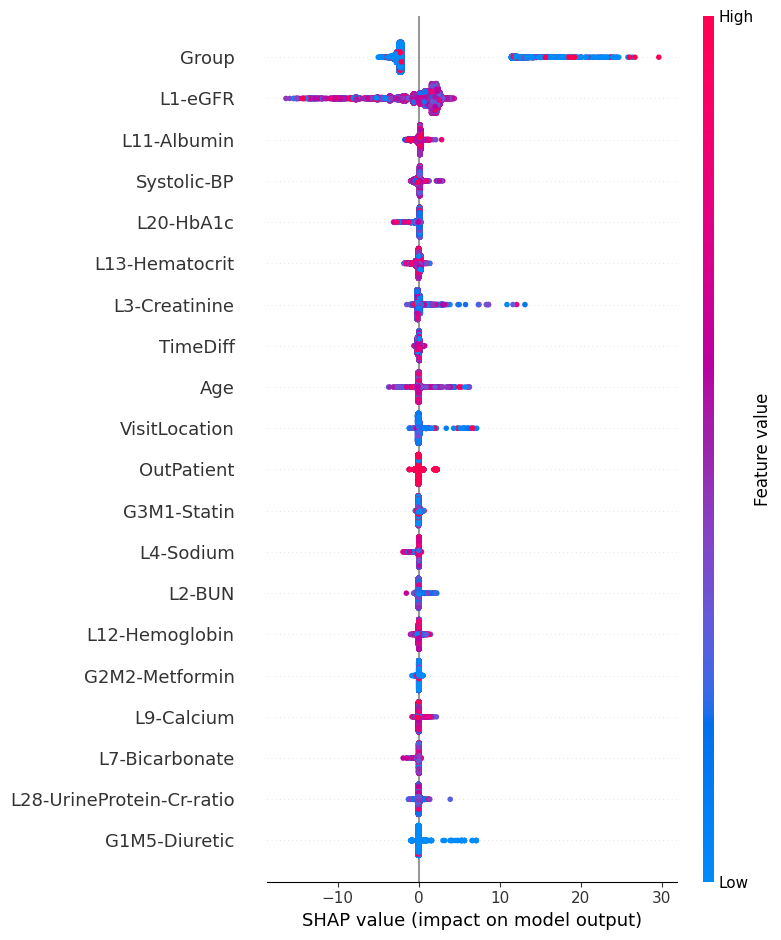

In [62]:
import shap
import matplotlib.pyplot as plt
fold_to_visualize = 0

shap_values = shap_values_list[fold_to_visualize][:X_test_scaled.shape[0]]
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, show=False)
plt.show()


# Classification: Stage

In [78]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตามระดับ 'eGFR'
def categorize_eGFR(eGFR_value):
    if eGFR_value >= 90:
        return 0
    elif 89.99 >= eGFR_value >= 60:
        return 1
    elif 59.99 >= eGFR_value >= 30:
        return 2
    elif 29.99 >= eGFR_value >= 15:
        return 3
    else:
        return 4

data['Stage'] = data['L1-eGFR'].apply(categorize_eGFR)

In [85]:
X = data.drop(['Stage', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold','L1-eGFR'], axis=1)
y = data['Stage']

In [86]:
xgb_metrics_list = []
confusion_matrices = []
smote = SMOTE()
data_X_train_before_resampled = []
data_y_train_before_resampled = []
data_X_train_after_resampled = []
data_y_train_after_resampled = []
data_test_sample_list = []
shap_values_list = []

for fold, (train_folds, test_fold) in enumerate(kf.split(all_folds)):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = data2['Fold'].isin(train_folds)
    test_indices = data2['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    data_X_train_before_resampled.append(X_train)
    data_y_train_before_resampled.append(y_train)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    data_X_train_after_resampled.append(X_train_resampled)
    data_y_train_after_resampled.append(y_train_resampled)
    data_test_sample_list.append(len(X_test))
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)
    best_params = xgb_grid_search_results[fold]['best_params']
    xgb_classifier = XGBClassifier(**best_params)
    xgb_classifier.fit(X_train_scaled, y_train_resampled)
    xgb_predictions = xgb_classifier.predict(X_test_scaled)
    xgb_accuracy = accuracy_score(y_test, xgb_predictions)
    xgb_precision = precision_score(y_test, xgb_predictions, average='weighted')
    xgb_recall = recall_score(y_test, xgb_predictions, average='weighted')
    xgb_f1 = f1_score(y_test, xgb_predictions, average='weighted')
    xgb_confusion_matrix = confusion_matrix(y_test, xgb_predictions)
    confusion_matrices.append(xgb_confusion_matrix.tolist())
    explainer = shap.TreeExplainer(xgb_classifier)
    shap_values = explainer.shap_values(X_test_scaled)
    shap_values_list.append(shap_values)
    xgb_metrics_list.append({
        'Fold': fold + 1,
        'Accuracy': xgb_accuracy,
        'Precision': xgb_precision,
        'Recall': xgb_recall,
        'F1 Score': xgb_f1,
    })

In [87]:
xgb_metrics_df = pd.DataFrame(xgb_metrics_list)
print(xgb_metrics_df)

   Fold  Accuracy  Precision    Recall  F1 Score
0     1  0.957708   0.960939  0.957708  0.958567
1     2  0.954772   0.957241  0.954772  0.955462
2     3  0.961049   0.963606  0.961049  0.961722
3     4  0.966460   0.968375  0.966460  0.966992
4     5  0.964011   0.966369  0.964011  0.964638


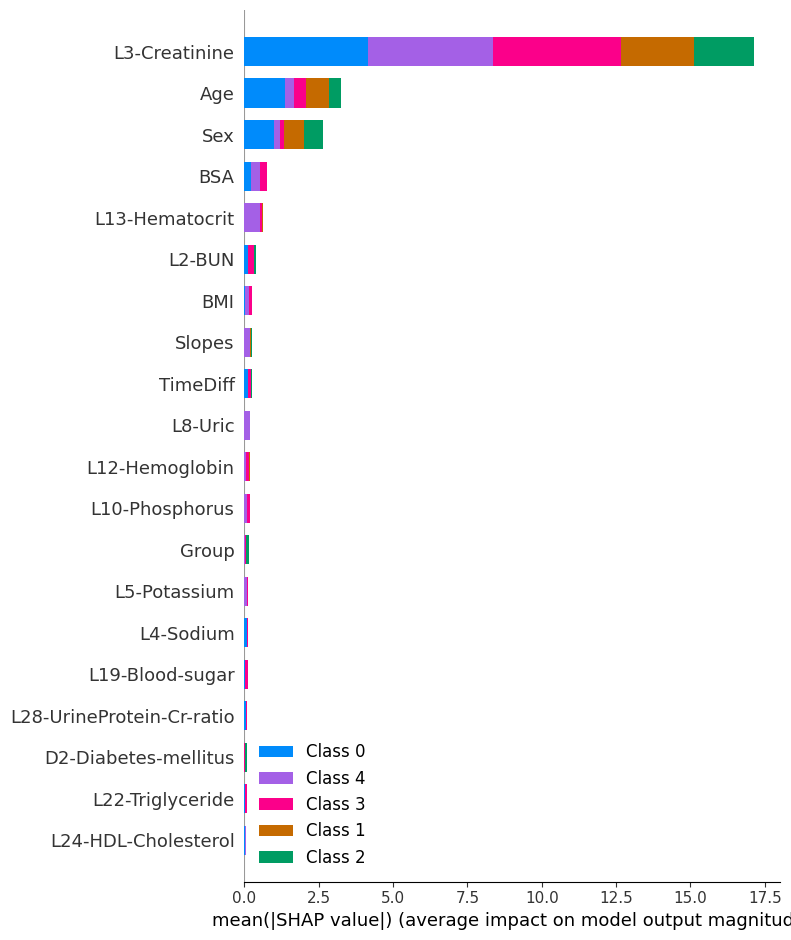

In [88]:
import shap
import matplotlib.pyplot as plt

# Assuming shap_values_list contains the SHAP values for each fold
fold_to_visualize = 0

shap_values = shap_values_list[fold_to_visualize][:X_test_scaled.shape[0]]
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, show=False)
plt.show()


In [89]:
X.head(2)

,Slopes,InPatient,OutPatient,Emergency,VisitLocation,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,Group,TimeDiff
0,-7.158596,0,1,0,0,90,0,0,0,0,...,194.24,91.0,5.284,215.0,81.0,123.0,99.0,21.019,0,0.000000
1,5.550691,0,1,0,0,90,90,0,0,0,...,251.46,86.0,5.755,219.0,64.0,146.0,73.0,15.198,1,1.131507


In [90]:
X.columns

Index(['Slopes', 'InPatient', 'OutPatient', 'Emergency', 'VisitLocation',
       'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic',
       'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB', 'G1M6-MRA',
       'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor', 'G2M1-SU',
       'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol', 'G1M9-Vasodilator',
       'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat',
       'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
       'Sex', 'Age', 'NATNL', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malign